In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scanpy as sc
import muon as mu
import graphtools
import magic
from matplotlib.pyplot import rc_context
from matplotlib import gridspec
import os


from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Arial']

In [ ]:
# figdir = '../../../Figures/Components'

In [3]:
harmony_vars = ['donor']

In [4]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/Manua...,/data/srla

Kaitlyn's defining CM/EM 

for CCA integrating RNA and protein, I used:

```prots_inc = c("AB_CD27", "AB_CD11a", "AB_CX3CR1", "AB_KLRG1_MAFA", "AB_CD4", "AB_CD8", "AB_CD45RO", "AB_CD45RA", "AB_CD197_CCR7", "AB_CD62L")```

then, I clustered cells on that embedding and used CD62L, CCR7, and CD27 to distinguish CM from EM

# Prepare markers

In [5]:
dataset = 'AMP-RA'

In [6]:
raw_counts_fn = params.loc[dataset, 'raw_counts_fn']#'/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBAT-CITESeq-DATA.Raw.T.ADTfixed.h5ad'
raw_counts_fn

'/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_ADT.RNA_counts.raw.ADTfixed.h5ad'

In [7]:
outdir = '../../../Data/PerDataset/AMPRA'

In [8]:
adata = sc.read(raw_counts_fn)
# adata.obs['frac_ADT'] = adata.obs['nCount_ADT'] / (adata.obs['nCount_ADT'] + adata.obs['nCount_RNA'])
ind = adata.var['feature_types']=='Antibody Capture'

Only considering the two last: ['.ADTfixed', '.h5ad'].
Only considering the two last: ['.ADTfixed', '.h5ad'].


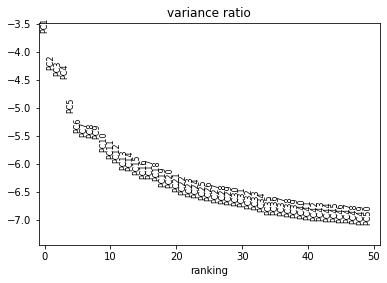

In [9]:
adata_RNA = adata[:,~ind].copy()
sc.pp.highly_variable_genes(adata_RNA, flavor='seurat_v3', n_top_genes=2000)
sc.pp.normalize_per_cell(adata_RNA, counts_per_cell_after=1e4)
sc.pp.log1p(adata_RNA)
sc.pp.scale(adata_RNA, zero_center=False)
sc.tl.pca(adata_RNA, use_highly_variable=True, zero_center=True)
sc.pl.pca_variance_ratio(adata_RNA, log=True, n_pcs=50)

In [10]:
sc.external.pp.harmony_integrate(adata_RNA,  harmony_vars, max_iter_harmony = 30)


2024-02-05 21:54:40,420 - harmonypy - INFO - Iteration 1 of 30
2024-02-05 22:00:31,804 - harmonypy - INFO - Iteration 2 of 30
2024-02-05 22:06:51,791 - harmonypy - INFO - Iteration 3 of 30
2024-02-05 22:09:31,033 - harmonypy - INFO - Iteration 4 of 30
2024-02-05 22:11:29,583 - harmonypy - INFO - Iteration 5 of 30
2024-02-05 22:13:35,920 - harmonypy - INFO - Iteration 6 of 30
2024-02-05 22:15:09,482 - harmonypy - INFO - Iteration 7 of 30
2024-02-05 22:16:25,575 - harmonypy - INFO - Iteration 8 of 30
2024-02-05 22:18:21,217 - harmonypy - INFO - Converged after 8 iterations


In [11]:
sc.pp.neighbors(adata_RNA, n_neighbors=5, n_pcs=39, use_rep='X_pca_harmony')

In [12]:
outfn = os.path.join(outdir, 'RNA_logTP1K_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/AMPRA/RNA_logTP1K_ForMAGIC.h5ad


In [13]:
adata_RNA.write(outfn)

In [ ]:
adata_RNA = sc.read(outfn)

Neighbors function kills kernel. Return to whatever this environment issue is later if necessary.

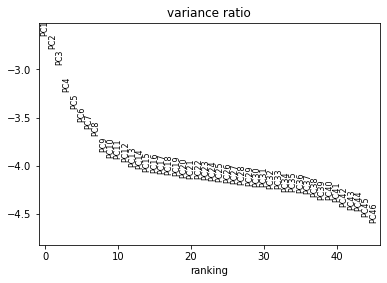

In [15]:
adata_ADT = adata[:,ind].copy()
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)
Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False, max_value=15)

sc.tl.pca(adata_ADT, zero_center=True)
sc.pl.pca_variance_ratio(adata_ADT, log=True, n_pcs=45)

In [16]:
sc.external.pp.harmony_integrate(adata_ADT,  harmony_vars, max_iter_harmony = 30)

2024-02-05 20:37:09,694 - harmonypy - INFO - Iteration 1 of 30
2024-02-05 20:45:29,962 - harmonypy - INFO - Iteration 2 of 30
2024-02-05 20:54:56,829 - harmonypy - INFO - Iteration 3 of 30
2024-02-05 21:04:26,702 - harmonypy - INFO - Iteration 4 of 30
2024-02-05 21:10:43,026 - harmonypy - INFO - Iteration 5 of 30
2024-02-05 21:14:09,842 - harmonypy - INFO - Iteration 6 of 30
2024-02-05 21:16:32,804 - harmonypy - INFO - Iteration 7 of 30
2024-02-05 21:18:26,241 - harmonypy - INFO - Iteration 8 of 30
2024-02-05 21:21:19,597 - harmonypy - INFO - Iteration 9 of 30
2024-02-05 21:22:58,694 - harmonypy - INFO - Iteration 10 of 30
2024-02-05 21:24:50,991 - harmonypy - INFO - Iteration 11 of 30
2024-02-05 21:27:12,128 - harmonypy - INFO - Iteration 12 of 30
2024-02-05 21:29:03,594 - harmonypy - INFO - Iteration 13 of 30
2024-02-05 21:30:40,096 - harmonypy - INFO - Iteration 14 of 30
2024-02-05 21:32:18,724 - harmonypy - INFO - Converged after 14 iterations


In [17]:
sc.pp.neighbors(adata_ADT, n_neighbors=5, n_pcs=44, use_rep='X_pca_harmony')

In [18]:
outfn = os.path.join(outdir, 'ADT_TP10KCLR_ForMAGIC.h5ad')
print(outfn)

../../../Data/PerDataset/AMPRA/ADT_TP10KCLR_ForMAGIC.h5ad


In [19]:
adata_ADT.write(outfn)

In [ ]:
adata_ADT = sc.read(outfn)

In [ ]:
rna_markers = ['TRAC', 'TRGC1', 'TRDC', 'TRBC1', 'IL2RA', 'FOXP3', 'SELL', 'CCR7', 'KLRB1', 'RTKN2', 'IL7R', 'PASK', 'GATA3',
               'CCR4', 'STAT1', 'IRF4', 'TBX21', 'IFNG', 'CCR5', 'CXCR3', 'CCR6', 'CCL20', 'IL4R', 'IL4', 'STAT4',  'STAT6',  'CCR1', 'IL10',
               'IL17B', 'IL17A', 'IL17F', 'IL17D', 'IL17C', 'RORC', 'RORA', 'STAT3']

In [ ]:
set(rna_markers) - set(adata_RNA.var.index)

In [ ]:
adt_markers = ['AB_CD3-1', 'AB_CD4-2',
               'AB_CD8', 'AB_CD45RA', 'AB_CD45RO',  'AB_CD18', 'AB_CD161',  'AB_CD194', 'AB_CD195', 'AB_CD196', 'AB_CXCR3',
               'AB_CD25', 'AB_CD127', 
               'AB_CD27-1',
               'AB_TCR-Vd2', 'AB_TCR-V-7.2', 'AB_TCR-V-9', 'AB_abTCR', 'AB_gdTCR',
               'AB_CD31', 'AB_CD62L', 'AB_CCR7',
               'AB_CD314',
               'AB_CD38-1', 'AB_CD39',
              'AB_CD94', 'AB_CD49b', 'AB_CD28'] 

In [ ]:
sorted(adata_ADT.var.index)

In [ ]:
set(adt_markers) - set(adata_ADT.var.index)

In [ ]:
adt_markers = list(set(adt_markers).intersection(adata_ADT.var.index))

In [ ]:
G = graphtools.Graph(data=adata_RNA.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_RNA.X, graph=G)
markers_magic = magic_operator.transform(X=adata_RNA[:, rna_markers].X)
markers_magic = pd.DataFrame(markers_magic, index=adata_RNA.obs.index, columns=rna_markers)

In [ ]:
G = graphtools.Graph(data=adata_ADT.obsp['connectivities'], precomputed='affinity')
magic_operator = magic.MAGIC(t=3)
magic_operator.fit(adata_ADT.X, graph=G)
markers_magic_adt = magic_operator.transform(X=adata_ADT[:, adt_markers].X)
markers_magic_adt = pd.DataFrame(markers_magic_adt, index=adata_ADT.obs.index, columns=adt_markers)

In [ ]:
for g in adt_markers:
    markers_magic[g] = markers_magic_adt[g]
    
# markers_magic['frac_ADT'] = adata.obs['frac_ADT']

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.MagicMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

In [ ]:
markers_magic.to_csv(outfn, sep='\t')

In [ ]:
markers_magic = pd.read_csv(outfn, sep='\t', index_col=0)

In [ ]:
markers_magic.head()

In [ ]:
unsmoothed_markers = pd.DataFrame(np.concatenate([adata_RNA[:, rna_markers].X.toarray(), np.array(adata_ADT[:, adt_markers].X)], axis=1), index=adata_RNA.obs.index,
             columns=(rna_markers+adt_markers))

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.UnsmoothedMarker.RNA_LogTP10KADT.ADT_CLRTP10K.tsv')
print(outfn)

In [ ]:
unsmoothed_markers.to_csv(outfn, sep='\t')

In [ ]:
unsmoothed_markers = pd.read_csv(outfn, sep='\t', index_col=0)

In [ ]:
markers = list(markers_magic.columns)

# Protein-RNA correlations

In [ ]:
from scipy.stats import pearsonr

In [ ]:
prot_pairs = [('CCR7', 'AB_CCR7'),
              ('CCR4', 'AB_CD194'),
              ('CCR6', 'AB_CD196'),
             ('CXCR3', 'AB_CXCR3'), 
              ('SELL', 'AB_CD62L'),
             ('IL2RA', 'AB_CD25'),
             ('FOXP3', 'AB_CD25'),
             ('TRDC', 'AB_gdTCR'),
             ('TRDC', 'AB_abTCR')]

In [ ]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(markers_magic[gene], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':markers_magic[gene], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare non MAGIC-smoothed markers


In [ ]:
for (gene, prot) in prot_pairs:
    # print(gene, prot)
    r, _ = pearsonr(unsmoothed_markers[gene], unsmoothed_markers[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[gene], 'y':unsmoothed_markers[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(gene)
    ax.set_ylabel(prot)

Compare proteins - MAGIC to non-smoothed

In [ ]:
prot_pairs

In [ ]:
for prot in ['AB_CCR7', 'AB_CD62L', 'AB_CD25']:
    r, _ = pearsonr(unsmoothed_markers[prot], markers_magic[prot])
    # print(r)
    
    fig, ax = plt.subplots(dpi = 150, figsize=(6,5))
    dsshow(pd.DataFrame({'x':unsmoothed_markers[prot], 'y':markers_magic[prot]}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    # ax.scatter(x = markers_magic[gene], y = markers_magic[prot], s = .2, alpha = .3)
    ax.text(.02, .96, ''.join(['R: ', str(round(r, 3))]), transform=ax.transAxes)
    ax.set_xlabel(prot + ' Non-smoothed')
    ax.set_ylabel(prot + ' Smoothed')

What proteins are correlated with CD25?

In [ ]:
ADT_corr = pd.DataFrame(adata_ADT.X).corr()
ADT_corr.index = adata_ADT.var.index
ADT_corr.columns = adata_ADT.var.index

In [ ]:
ADT_corr['AB_CD25'].sort_values(ascending = False).head(20)

In [ ]:
ADT_corr['AB_CD25'].sort_values(ascending = False).tail(20)

# Lineage marker gating - RNA and proteins

Use both RNA and proteins to gate, including various combinations of CCR7, SELL, CD197, and CD62L.

In [ ]:
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    
def gate(data, g1, g2, ind=None, vertical_gate=None, horizontal_gate=None, quadrant_gate=None,
         labfontsize=9, plot_labeled=False, upper_only=False, ax=None):
    
    
    if ax is None:
        fig = plt.figure(constrained_layout=True, figsize=(2., 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.95, top=.92)
        ax = fig.add_subplot(gs[0])

    if ind  is None:
        ind = pd.Series(np.array([True]*data.shape[0]), data.index)
    
    
    x = data.loc[ind, g1]
    y = data.loc[ind, g2]
    
    dsshow(pd.DataFrame({'x':x, 'y':y}), ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto')
    ax.set_xlabel(g1, fontsize=labfontsize)
    ax.set_ylabel(g2, fontsize=labfontsize)

    
    if vertical_gate is not None:
        xlim = ax.get_xlim()
        ax.hlines(y=vertical_gate['vthresh'], xmin=xlim[0], xmax=xlim[1], linestyle='--', color='k', linewidth=1)
        ax.set_xlim(xlim)
        
            
        initial_res = (data.loc[ind, g2]>vertical_gate['vthresh']).replace({True:vertical_gate['above_name'], False:vertical_gate['below_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
    elif horizontal_gate is not None:
        ylim = ax.get_ylim()
        ax.vlines(x=horizontal_gate['hthresh'], ymin=ylim[0], ymax=ylim[1], linestyle='--', color='k', linewidth=1)
        ax.set_ylim(ylim)
        
        initial_res = (data.loc[ind, g1]>horizontal_gate['hthresh']).replace({False:horizontal_gate['left_name'], True:horizontal_gate['right_name']})
        final_res = ind.copy()
        final_res.loc[ind] = initial_res
        final_res.loc[~ind] = np.nan
        
        
    elif quadrant_gate is not None:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        if not upper_only:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=xlim[0]-1, xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=ylim[0]-1, ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)
        else:
            ax.hlines(y=quadrant_gate['vthresh'], xmin=quadrant_gate['hthresh'], xmax=xlim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_xlim(xlim)
            ax.vlines(x=quadrant_gate['hthresh'], ymin=quadrant_gate['vthresh'], ymax=ylim[1]+1, linestyle='--', color='k', linewidth=1)
            ax.set_ylim(ylim)            
            

        indh = data.loc[ind, g1]> quadrant_gate['hthresh']
        indv = data.loc[ind, g2]> quadrant_gate['vthresh']
        final_res = ind.replace(False,np.nan)
        for hval,vval, lab in [[False, False, quadrant_gate['ll']], [True, False, quadrant_gate['lr']], [False, True, quadrant_gate['ul']], [True, True, quadrant_gate['ur']]]:
            tolab = (indh==hval) & (indv==vval)
            final_res.loc[tolab.index[tolab]] = lab
            
            
    if plot_labeled:
        fig = plt.figure(constrained_layout=True, figsize=(2.4, 2.), dpi=200)
        gs = gridspec.GridSpec(1, 1, figure=fig, left=0.2,
                       bottom=.2, right=.8, top=.92)
        ax2 = fig.add_subplot(gs[0])
        dat = pd.concat([x,y,final_res], axis=1)
        dat.columns = [g1, g2, 'label']
        for (k,g) in dat.groupby('label'):
            ax2.scatter(g[g1], g[g2], label=k, s=.5, edgecolor='None')
        ax2.legend(bbox_to_anchor=(1,1), markerscale=3, fontsize=6)
        
        
        
    return(final_res, ax)

In [ ]:
gating = pd.DataFrame(index=markers_magic.index, columns=['gdT', 'MAIT', 'CD4_vs_CD8', 'Treg', 'CD4_Conv', 'CD8_Conv'])

In [ ]:
g1 = 'AB_abTCR'
g2 = 'AB_TCR-Vd2'   
vgate = {'vthresh':2, 'above_name':'gdT', 'below_name':'ab'}
gating['gdT'], ax = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False)
ax.text(4.5,6, 'gdT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_gdT.pdf'))

In [ ]:
g1 = 'AB_TCR-V-7.2'
g2 = 'AB_CD161'  
gating['MAIT'], ax = gate(markers_magic, g1, g2, ind=gating['gdT']=='ab',
                      quadrant_gate={'vthresh':2, 'hthresh':2, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True)
ax.text(2.6,5, 'MAIT', fontsize=9)
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_MAIT.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_MAIT.pdf'))

In [ ]:
g1 = 'AB_CD4-2'
g2 = 'AB_CD8'    
gating['CD4_vs_CD8'], ax = gate(markers_magic, g1, g2, ind=gating['MAIT']=='ab', quadrant_gate={'vthresh':1, 'hthresh':1.1, 'll':'DN', 'ul':'CD8', 'ur':'DP', 'lr':'CD4'},
                            plot_labeled=False)
ax.text(.6,2.7, 'CD8', fontsize=9)
ax.text(2.55, .75, 'CD4', fontsize=9)
ax.text(2.5,2.5, 'DP', fontsize=9)
ax.text(.45, .15, 'DN', fontsize=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4CD8.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4CD8.pdf'))

In [ ]:
g2 = 'AB_CD25'     
g1 = 'AB_CD39'

gating['Treg'],ax = gate(markers_magic, g1, g2, ind=gating['CD4_vs_CD8']=='CD4', 
               quadrant_gate={'vthresh':2., 'hthresh':1.8, 
                              'll':'CD4', 'ur':'Treg', 'ul':'CD4', 'lr':'CD4'
                             },
                      plot_labeled=False, upper_only=True)

ax.text(2, 5, 'Treg', fontsize=9)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Treg.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Treg.pdf'))

In [ ]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD4_Conv'],ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'),
                           quadrant_gate={'vthresh':1.7, 'hthresh':2.7, 'll':'CD4_EM', 'ur':'CD4_Naive', 'ul':'CD4_CM', 'lr':'CD4_TEMRA'},
                           plot_labeled=False)

ax.text(3., 3.6, 'CD4 Naive', fontsize=9)
ax.text(2.73, .6, 'CD4 TEMRA', fontsize=9)

ax.text(1., 3.6, 'CD4 CM', fontsize=9)
ax.text(1., .6, 'CD4 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)


plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD4Naive.pdf'))

In [ ]:
g1 = 'AB_CD62L'     
g2 = 'AB_CCR7'
_ = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})


In [ ]:
g1 = 'SELL'     
g2 = 'CCR7'
_,ax = gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])), quadrant_gate={'vthresh':1.7, 'hthresh':1.7, 'll':'CD4_Memory', 'ul':'CD4_Naive', 'ur':'CD4_Memory', 'lr':'CD4_Memory'})
ax.set_ylabel('CCR7 RNA', fontsize=9)
ax.set_xlabel('SELL RNA', fontsize=9)

In [ ]:
g1 = 'AB_CD62L'
g2 = 'AB_CD27-1'     
gate(markers_magic, g1, g2, ind=(gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM'])),
                                   vertical_gate={'vthresh':.6, 'above_name':'CD4_Memory', 'below_name':'CD4_TerminalEffector'},
                                   plot_labeled=False)

In [ ]:
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
gating['CD8_Conv'], ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'),
                           quadrant_gate={'vthresh':1.8, 'hthresh':3, 'll':'CD8_EM', 'ul':'CD8_CM', 'ur':'CD8_Naive', 'lr':'CD8_TEMRA'},
                                                             plot_labeled=False)

ax.text(3.1, 3.4, 'CD8 Naive', fontsize=9)
ax.text(3.1, .6, 'CD8 TEMRA', fontsize=9)

ax.text(1.24, 3.4, 'CD8 CM', fontsize=9)
ax.text(1.24, .6, 'CD8 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.35)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)


plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD8Naive.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_CD8Naive.pdf'))

In [ ]:
g1 = 'AB_CD62L'   
g2 = 'AB_CCR7'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=True)


In [ ]:
g1 = 'SELL'   
g2 = 'CCR7'     
_ = gate(markers_magic, g1, g2, ind=(gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])), quadrant_gate={'vthresh':4.4, 'hthresh':1, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)


In [ ]:
label = gating.apply(lambda x: x[x.last_valid_index()], axis=1)

In [ ]:
label.value_counts()

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.Magic.20230831.tsv')
print(outfn)

In [ ]:
gating.to_csv(outfn, sep='\t')

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

In [ ]:
label.to_csv(outfn, sep='\t')

In [ ]:
os.path.abspath('../../../Data/PerDataset/COMBAT/ManualGating.Magic.FinalLabel.20230831.tsv')

In [ ]:
ncols = 3
nrows = 2

umap_dim = 1.5
wspace = 0.35
hspace = 0.15
right = .98
left = .15
bottom = .15
top = .98
fig_width = ncols*umap_dim+(ncols-1)*wspace*umap_dim
fig_height = nrows*umap_dim+(nrows-1)*wspace*umap_dim

fig = plt.figure(constrained_layout=False, figsize=(fig_width, fig_height), dpi=200)
gs = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[umap_dim]*ncols, height_ratios=[umap_dim]*nrows,
                       bottom=bottom, left=left, right=right, top=top,  wspace=wspace)

axes = []
for i in range(nrows):
    rax = []
    for j in range(ncols):
        rax.append(fig.add_subplot(gs[i,j]))
    axes.append(rax)

axes = np.array(axes)





this_ax = axes[0, 0]
g1 = 'AB_abTCR'
g2 = 'AB_TCR-Vd2'   
vgate = {'vthresh':2, 'above_name':'gdT', 'below_name':'ab'}
_, _ = gate(markers_magic, g1, g2, ind=None, vertical_gate=vgate, plot_labeled=False, ax=this_ax)
this_ax.text(4.5,6, 'gdT', fontsize=9)

this_ax = axes[1, 0]
g1 = 'AB_TCR-V-7.2'
g2 = 'AB_CD161'  
_, _ = gate(markers_magic, g1, g2, ind=gating['gdT']=='ab',
                      quadrant_gate={'vthresh':2, 'hthresh':2, 'ur':'MAIT', 'ul':'ab', 'll':'ab', 'lr':'ab'}, plot_labeled=False, upper_only=True, ax=this_ax)
this_ax.text(2.6,5, 'MAIT', fontsize=9)


this_ax = axes[1, 1]
g1 = 'AB_CD4-2'
g2 = 'AB_CD8'    
_, ax = gate(markers_magic, g1, g2, ind=gating['MAIT']=='ab', quadrant_gate={'vthresh':1, 'hthresh':1.1, 'll':'DN', 'ul':'CD8', 'ur':'DP', 'lr':'CD4'},
                            plot_labeled=False, ax=this_ax)
ax.text(.4,2.7, 'CD8', fontsize=9)
ax.text(2.5, .75, 'CD4', fontsize=9)
ax.text(2.5,2.5, 'DP', fontsize=9)
ax.text(.45, .15, 'DN', fontsize=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.15)



this_ax = axes[1, 2]
g2 = 'AB_CD25'     
g1 = 'AB_CD39'

_,ax = gate(markers_magic, g1, g2, ind=gating['CD4_vs_CD8']=='CD4', 
               quadrant_gate={'vthresh':2., 'hthresh':1.8, 
                              'll':'CD4', 'ur':'Treg', 'ul':'CD4', 'lr':'CD4'
                             },
                      plot_labeled=False, upper_only=True, ax=this_ax)

ax.text(2, 5, 'Treg', fontsize=9)


this_ax = axes[0, 2]

g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
_,ax = gate(markers_magic, g1, g2, ind=(gating['Treg']=='CD4'),
                           quadrant_gate={'vthresh':1.7, 'hthresh':2.7, 'll':'CD4_EM', 'ur':'CD4_Naive', 'ul':'CD4_CM', 'lr':'CD4_TEMRA'},
                           plot_labeled=False, ax=this_ax)

ax.text(2.9, 3.6, 'CD4 Naive', fontsize=9)
ax.text(2.73, .6, 'CD4 TEMRA', fontsize=9)

ax.text(1., 3.6, 'CD4 CM', fontsize=9)
ax.text(1., .6, 'CD4 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+.95)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)



this_ax = axes[0, 1]
g1 = 'AB_CD45RA'     
g2 = 'AB_CD62L'
_, ax = gate(markers_magic, g1, g2, ind=(gating['CD4_vs_CD8']=='CD8'),
                           quadrant_gate={'vthresh':1.8, 'hthresh':3, 'll':'CD8_EM', 'ul':'CD8_CM', 'ur':'CD8_Naive', 'lr':'CD8_TEMRA'},
                                                             plot_labeled=False, ax=this_ax)

ax.text(3.4, 3.4, 'CD8 Naive', fontsize=9)
ax.text(3.1, .6, 'CD8 TEMRA', fontsize=9)

ax.text(1.24, 3.4, 'CD8 CM', fontsize=9)
ax.text(1.24, .6, 'CD8 EM', fontsize=9)



xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim[0], xlim[1]+1.3)
ax.set_ylim(ylim[0]-.2, ylim[1]+.15)

plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Merged.png'))
plt.savefig(os.path.join(figdir, 'ManualGating_COMBAT_Merged.pdf'))

# Overlap with GEPs

In [ ]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params.loc['COMBAT', 'tcat_fn']

In [ ]:
tcat_gep_info = read_dataset_log('cGEP_Name')
tcat_gep_info.head()

In [ ]:
renmap = dict(zip(tcat_gep_info['cGep_Name'], tcat_gep_info['Short_Name']))

In [ ]:
tcat_usage = pd.read_csv(params.loc['COMBAT', 'tcat_fn'], sep='\t', index_col=0).rename(columns=renmap)

In [ ]:
tcat_usage_norm = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)

In [ ]:
tcat_usage_norm.head()

In [ ]:
tcat_gep_info.loc[tcat_gep_info['Class'] == 'Lineage', :]

In [ ]:
tcat_usage_norm.columns

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

In [ ]:
label = pd.read_csv(outfn, sep='\t', index_col=0)['0']
label.head()

In [ ]:
cluster = tcat_usage_norm.groupby(label).mean()

lineage_order = ['Treg', 'gdT', 'MAIT','CD4_Naive',  'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA', 
                 'CD8_CM', 'CD8_EM',  'CD8_TEMRA',
                 'DN', 'DP',  ]


max_usage = cluster.max(axis=0).sort_values(ascending=False)


lineage_geps = ['Treg', 'gdT-Blood', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Th17', 'CD4-EM',  'Th2-1',  'CD8-EM', 'NK-like']
other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19-Secretion', 'HLA', 'CellCycle-S', 'ISG',  'Early-Activation']
'''
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
'''
gep_order = lineage_geps + other_geps

cluster = cluster.loc[lineage_order, gep_order]


cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)
vmax=0.7


frac_lineage = (len(lineage_geps) / len(lineage_geps+other_geps))
frac_other = 1-frac_lineage



fig = plt.figure(figsize=(4, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.3, top=.9, left=0.2)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(cluster_norm.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax,
            xticklabels=True, cbar_kws={'orientation':'horizontal', 'ticks':[0,vmax], 'shrink':0.1, 'aspect':30},
            vmin=0, vmax=vmax)
sns.heatmap(cluster_norm.loc[:,other_geps], ax=other_ax, cbar=False, vmin=0, vmax=vmax, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=10)
other_ax.set_ylabel('')
fig.text(0.6, 0.02, 'Gene Expression Program', ha='center', va='center', fontsize=10)

lin_ax.set_yticks(np.arange(cluster_norm.shape[0])+0.5)
lin_ax.set_yticklabels([x.replace('_', ' ') for x in cluster_norm.index], fontsize=8)

lin_ax.set_xticks(np.arange(len(lineage_geps))+0.5)
lin_ax.set_xticklabels(lineage_geps, fontsize=8)

other_ax.set_xticks(np.arange(len(other_geps))+0.5)
other_ax.set_xticklabels([x.replace('-Secretion', '') for x in other_geps], fontsize=8)

lin_ax.set_title('Lineage Associated', fontsize=10)
other_ax.set_title('Example Other', fontsize=10)


cax.tick_params(labelsize=8)

plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.pdf'))

## Quantify strength of association

In [ ]:
import scipy.stats as stats


In [ ]:

mapping = {'Treg':'Treg', 'gdT':'gdT-Blood', 'MAIT':'MAIT', 'CD4_Naive':'CD4-Naive', 'CD8_Naive':'CD8-Naive',
           'CD4_TEMRA':'NK-like',  'CD8_TEMRA':'NK-like'}
for gate in ['Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD8_Naive', 'CD4_TEMRA', 'CD8_TEMRA']:
    print(gate, mapping[gate], stats.ranksums(tcat_usage_norm.loc[label==gate, mapping[gate]], 
               tcat_usage_norm.loc[label!=gate, mapping[gate]]))

In [ ]:
allP = pd.DataFrame(np.nan, index=cluster_norm.index, columns=gep_order)
allH = pd.DataFrame(np.nan, index=cluster_norm.index, columns=gep_order)

for gate in allP.index:
    for gep in gep_order:
        H,P = stats.ranksums(tcat_usage_norm.loc[label==gate, gep], 
               tcat_usage_norm.loc[label!=gate, gep])
        allP.at[gate, gep] = P
        allH.at[gate, gep] = H

In [ ]:
allP_positive = allP.copy()
allP_positive.values[allH<0] = np.nan
allP_positive

In [ ]:
allP

In [ ]:
allH

In [ ]:
import statsmodels.api as sm

In [ ]:
set(gep_order) - set(tcat_usage_norm.std(axis=0).sort_values(ascending=False).index[:30]) 

In [ ]:
geps = list(set(tcat_usage_norm.std(axis=0).sort_values(ascending=False).index[:30]) )

#X = tcat_usage_norm.loc[:,gep_order]
X = tcat_usage_norm.loc[:,geps]

allP = pd.DataFrame(np.nan, index=cluster_norm.index, columns=X.columns)
allH = pd.DataFrame(np.nan, index=cluster_norm.index, columns=X.columns)

X_norm = X.subtract(X.mean(axis=0), axis=1)
X_norm = X_norm.div(X_norm.std(axis=0), axis=1)
label_for_test = label.loc[X_norm.index]
X_norm = X_norm.loc[label_for_test.index, :]

for gate in allP.index:
    Y = (label_for_test==gate).astype(int)
    logit_mod = sm.Logit(Y, X_norm)
    logit_res = logit_mod.fit(disp=0)
    print(gate)
    summ = pd.concat([logit_res.params, logit_res.pvalues], axis=1)
    summ.columns = ['Beta', 'P-value']
    allH.loc[gate, :] = summ['Beta']
    allP.loc[gate, :] = summ['P-value']
    summ = summ.sort_values(by='Beta', ascending=False)
    display(summ)


In [ ]:
sns.clustermap(allH, vmax=2)

In [ ]:
forsumm = allH.T

for c in ['Treg', 'gdT', 'MAIT', 'CD4_Naive', 'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD8_TEMRA']:
    Z = forsumm[c].sort_values(ascending=False)
    maxind = Z.index[0]
    print(c, maxind, Z.iloc[0], Z.iloc[0] - Z.iloc[1], allP.loc[c, maxind])

In [ ]:
allH.loc['CD4_EM', :].sort_values(ascending=False)

In [ ]:
allP.loc['CD4_EM', :].sort_values(ascending=True)

In [ ]:

lineage_geps = ['Treg', 'gdT-Blood', 'MAIT', 'CD4-Naive', 'CD8-Naive',  'CD4-CM', 'Th17', 'CD4-EM',  'Th2-1',  'CD8-EM', 'NK-like']
other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19-Secretion', 'ISG', 'TIMD4/TIM3-Activation', 'IEG', 'BCL2-Survival']
#other_geps = ['Cytotoxic', 'Translation', 'IL10/IL19-Secretion', 'HLA', 'CellCycle-S', 'ISG',  'Early-Activation']


'''
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
'''
gep_order = lineage_geps + other_geps

vmin = 0 #allH.min().min()
vmax= 1.25


fig = plt.figure(figsize=(4, 3), dpi=300)
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.3, top=.9, left=0.2)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(allH.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax,
            xticklabels=True, cbar_kws={'orientation':'horizontal', 'ticks':[vmin,vmax], 'shrink':0.1, 'aspect':30},
            vmin=vmin, vmax=vmax)
sns.heatmap(allH.loc[:,other_geps], ax=other_ax, cbar=False, vmin=vmin, vmax=vmax, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=10)
other_ax.set_ylabel('')
fig.text(0.6, 0.02, 'Gene Expression Program', ha='center', va='center', fontsize=10)

lin_ax.set_yticks(np.arange(cluster_norm.shape[0])+0.5)
lin_ax.set_yticklabels([x.replace('_', ' ') for x in cluster_norm.index], fontsize=8)

lin_ax.set_xticks(np.arange(len(lineage_geps))+0.5)
lin_ax.set_xticklabels(lineage_geps, fontsize=8)

other_ax.set_xticks(np.arange(len(other_geps))+0.5)
other_ax.set_xticklabels([x.replace('-Secretion', '').replace('-Activation', '') for x in other_geps], fontsize=8)

lin_ax.set_title('Lineage Associated', fontsize=10)
other_ax.set_title('Example Other', fontsize=10)


cax.tick_params(labelsize=8)

plt.savefig(os.path.join(figdir, 'LineageAssociate_Logistic_COMBAT.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_Logistic_COMBAT.pdf'))

In [ ]:
len(set(allH.columns) - set(lineage_geps)), len(other_geps)

In [ ]:
sns.heatmap(allH, vmax=2)

In [ ]:
label.index

In [ ]:
tcat_usage_norm.loc[label==gate, mapping[gate]]

In [ ]:
gate
               

In [ ]:
import matplotlib
matplotlib.figure.Figure.colorbar(

In [ ]:
cluster_norm

In [ ]:
cluster = tcat_usage_norm.groupby(label).mean()

sns.clustermap(cluster, xticklabels=True, yticklabels=True)

In [ ]:
cluster = tcat_usage_norm.groupby(label).mean()
cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)

cluster.max(axis=0).sort_values(ascending=False)

In [ ]:
cluster_norm.max(axis=0).sort_values(ascending=False)

# Scratch

## Scratch - Polarization gating

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'Th2'

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

    
for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'CCR3+-Th2'

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])

pairs = [('AB_CD194', 'GATA3'), ('CCR4', 'GATA3'), ('IL4', 'GATA3'), ('IL4R', 'GATA3')]
vmax=0.3

tcat_usage_ren2 = tcat_usage_ren.copy()
tcat_usage_ren2['Th2_Full'] = tcat_usage_ren2['Th2'] + tcat_usage_ren2['CCR3+-Th2']
gep = 'Th2_Full'


for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren2.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM'])
gep = 'Th17'

pairs = [('AB_CD196', 'RORC'), ('CCR6', 'RORC'), ('IL17A', 'RORC'), ('RORA', 'RORC'), ('STAT3', 'RORC')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'CD4 TEM'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'Cytotoxic'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin([ 'CD4_EM'])
gep = 'High-Cytokine'

pairs = [('AB_CXCR3', 'TBX21'), ('CXCR3', 'TBX21'), ('AB_CXCR3', 'IFNG'), ('CXCR3', 'IFNG'), ('IFNG', 'TBX21')]
vmax=0.3

for g1,g2 in pairs:

    x = markers_magic.loc[ind, g1]
    y = markers_magic.loc[ind, g2]
    c = tcat_usage_ren.loc[ind, gep]

    (fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
    ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
    
    if 'AB_' in g1:
        ax.set_xlabel(g1)
    else:
        ax.set_xlabel(g1 + ' RNA')
        
    if 'AB_' in g2:
        ax.set_ylabel(g2)
    else:
        ax.set_ylabel(g2 + ' RNA')
        
        
        ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
g1 = 'IL4R'   
g2 = 'GATA3'
gep = 'Th2'
x = markers_magic.loc[ind, g1]
y = markers_magic.loc[ind, g2]
c = tcat_usage_ren.loc[ind, gep]
vmax=0.3

(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
ax.set_xlabel(g1 + ' RNA')
ax.set_ylabel(g2 + ' RNA')
ax.set_title(gep + ' Usage')

In [ ]:
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
g1 = 'AB_CD194'   
g2 = 'GATA3'
gep = 'Th2'
x = markers_magic.loc[ind, g1]
y = markers_magic.loc[ind, g2]
c = tcat_usage_ren.loc[ind, gep]
vmax=0.3

(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(x,y,c=c, vmin=0, vmax=vmax, s=1, edgecolor='None')
ax.set_xlabel(g1)
ax.set_ylabel(g2 + ' RNA')
ax.set_title(gep + ' Usage')

In [ ]:

ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)


In [ ]:
g1 = 'CCR4'   
g2 = 'GATA3'
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)

In [ ]:
g1 = 'AB_CD194'   
g2 = 'GATA3'
ind = gating['CD4_Conv'].isin(['CD4_CM', 'CD4_EM', 'CD4_TEMRA']) | gating['CD8_Conv'].isin(['CD8_CM', 'CD8_EM', 'CD8_TEMRA'])
_ = gate(markers_magic, g1, g2, ind=ind, quadrant_gate={'vthresh':4.4, 'hthresh':1.5, 'll':'CD8_EM', 'lr':'CD8_EM',
                                                                                    'ul':'CD8_EM', 'ur':'CD8_CM'}, plot_labeled=False)

## Scratch - Overlap with GEPs

In [ ]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

In [ ]:
usage_fn = params.loc['COMBAT', 'usage_fn']
usage = pd.read_csv(usage_fn, sep='\t', index_col=0)
usage = usage.div(usage.sum(axis=1), axis=0)
usage.head()

In [ ]:
outfn = os.path.join(outdir, 'ManualGating.Magic.FinalLabel.20230831.tsv')
print(outfn)

In [ ]:
label = pd.read_csv(outfn, sep='\t', index_col=0)['0']
label.head()

In [ ]:
(fig,ax) = plt.subplots(1,1, figsize=(8,5), dpi=200)
cluster = usage.groupby(label).mean()

gep_order = ['Treg',  'gdT','MAIT', 'CD4_CM-2', 'CD8_Naive', 'CD8_CD160high','Th17', 'Th2',  'dnT',
             
        'Translation', 'Cytoskeleton',  '?AB_CD278/ACTG1',
       'Doublet_Plasmablast', 'Cytotoxic', 'HeatShock', 
       'PoorQuality', 'Mito', 'IEG',   'TYMS/ATP5F1D',
       'ISG', '?CCR10/LMNA', 'CellCycle_G2M_2', 'Doublet_Myeloid',
       'AB_CD86/TIMD4', 'CellCycle_S', 'AB_CD278/LGMN/IL21', 'HLA', 'NK-like',
        'IL26/RORC/CTSH',  'CellCycle_Histone', 
       'CellCycle_G2M', 'CellCycle_Histone3', 'Doublet_Plasmablast2',
       'CDO1/IGFL2', 'SFRP4/CADM1', 'Metallothionein', 'CellCycle_Histone2',
       'Doublet_Platelet', 'Doublet_DC', '?Myeloid',  'HeatShock2',
       'TRAV24/TBC1D4', 'Doublet_RBC', '?PGLYRP1/LTF']


lineage_order = ['Treg', 'gdT', 'MAIT', 'CD4_CM', 'CD4_EM',  'CD8_Naive', 'CD8_CM', 'CD8_EM', 'CD8_TEMRA',
                 'CD4_Naive', 'CD4_TEMRA', 'DN', 'DP',  ]

cluster = cluster.loc[lineage_order, gep_order]

max_usage = cluster.max(axis=0).sort_values(ascending=False)
tofilt = max_usage.index[max_usage<0.01]

cluster = cluster.drop(tofilt, axis=1)


sns.heatmap(cluster, ax=ax, xticklabels=True, vmax=0.3)

In [ ]:
cluster_info_fn = read_dataset_log('Current Meta-program Paths').at[0, 'clustering_fn']
cluster_info = pd.read_csv(cluster_info_fn, sep='\t', index_col=0)
cluster_info.head()

In [ ]:
tcat_fn = params.loc['COMBAT', 'tcat_fn']
print(tcat_fn)

tcat_usage = pd.read_csv(tcat_fn, sep='\t', index_col=0)
tcat_usage = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)
tcat_usage.head()

In [ ]:
tcat_usage_filt = tcat_usage.loc[:, cluster_info['COMBAT'].dropna().index]

In [ ]:
tcat_gep_info = read_dataset_log('GEP_Name')
tcat_gep_info.head()

In [ ]:
rename_map = dict(zip(tcat_gep_info['MetaGep_Name'], tcat_gep_info['Short_Name']))

In [ ]:
tcat_usage_ren = tcat_usage_filt.rename(rename_map, axis=1)

In [ ]:
set(lineage_geps) - set(tcat_usage_ren.columns)

In [ ]:
cluster = tcat_usage_ren.groupby(label).mean()

In [ ]:
cmax = cluster.max(axis=0).sort_values(ascending=False)
toconsider = cmax.index[cmax>0.02]
toconsider

In [ ]:
ratio = {}
for c in toconsider:
    sortedv = cluster[c].sort_values(ascending=False)
    ratio[c] = sortedv.iloc[0]/sortedv.iloc[1]

In [ ]:
pd.Series(ratio).sort_values(ascending=False).index

In [ ]:
sorted(set(cluster.columns) - set(toconsider))

In [ ]:
others = ['CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']

In [ ]:
set(others) - set(tcat_usage_ren.columns)

In [ ]:
cmax.loc[['KLRC2/GNLY', 'NK-Like-3', 'CD4 TCM']]

In [ ]:
cluster = tcat_usage_ren.groupby(label).mean()

lineage_order = ['Treg', 'gdT', 'MAIT','CD4_Naive',  'CD8_Naive', 'CD4_CM', 'CD4_EM', 'CD4_TEMRA',  'CD8_CM', 'CD8_EM',  'CD8_TEMRA',
                 'DN', 'DP',  ]


max_usage = cluster.max(axis=0).sort_values(ascending=False)


lineage_geps = ['Treg', 'gdT-Blood', 'MAIT', 'CD4-Naive', 'CD8-Naive', 'Th17',  'CD4 TCM', 'Th2','CD8_EM']
other_geps = [ 'IL10/CD38', 'CTLA4+CD38+',
 'CellCycle-G2M',
 'CellCycle-Histone',
 'CellCycle-S',
 'Cytoskeleton',
 'IL26/CTSH',
 'Metallothionein',
'S100A10/LMNA', 'MALAT1',  'ISG', 'Mito', 'HLA',  'Cytotoxic',  'HeatShock2', 'IEG']
gep_order = lineage_geps + other_geps

cluster = cluster.loc[lineage_order, gep_order]


cluster_norm = cluster.div(cluster.sum(axis=0), axis=1)



frac_lineage = (len(lineage_geps) / len(lineage_geps+other_geps))
frac_other = 1-frac_lineage



fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, frac_lineage, frac_other], height_ratios=[.1,.9], wspace=0.1, bottom=0.25)

# Colorbar axis
top_ax = fig.add_subplot(gs[0, 0:2])
lin_ax = fig.add_subplot(gs[1,1])
other_ax = fig.add_subplot(gs[1, 2])
top_ax.axis('off')


cax = top_ax.inset_axes([-0.1, .5, 0.15, 0.4], transform=top_ax.transAxes)
#fig.colorbar(scim, ax=axes[x,y], cax=cax, orientation='horizontal')



sns.heatmap(cluster_norm.loc[:,lineage_geps], ax=lin_ax, cbar_ax=cax, xticklabels=True, cbar_kws={'label': 'Rel.Usage', 'orientation':'horizontal',
                                                                               'ticks':[0,1], 'shrink':0.1, 'aspect':30}, vmin=0, vmax=1)
sns.heatmap(cluster_norm.loc[:,other_geps], ax=other_ax, cbar=False, vmin=0, vmax=1, xticklabels=True)
other_ax.set_yticks([])
lin_ax.set_ylabel('Manually Gated Lineage', fontsize=12)
other_ax.set_ylabel('')
fig.text(0.5, 0, 'Gene Expression Program', ha='center', va='center', fontsize=12)

lin_ax.set_title('Lineage Associated', fontsize=12)
other_ax.set_title('Example Other', fontsize=12)

plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.png'))
plt.savefig(os.path.join(figdir, 'LineageAssociate_COMBAT_Relative.pdf'))

In [ ]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'Th17',
 'CD4 TCM',
 'Th2',
 'CD8_EM']
sns.clustermap(tcat_usage_ren.loc[label=='DN', geeps])

In [ ]:
Z = tcat_usage_ren.drop('IL10/CD38', axis=1)
Z = Z.div(Z.sum(axis=1), axis=0)

In [ ]:
pd.crosstab(label, tcat_usage_ren['IL10/CD38']>.1)

In [ ]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'CD4 TCM',
 'CD8_EM',
        'Th2',  'Th17']

cmap2 = sns.color_palette("mako", as_cmap=True)

fig = plt.figure(figsize=(6, 6), dpi=200)   
gs = gridspec.GridSpec(2, 3, width_ratios=[0.05, 1, .1], height_ratios=[1, 1])

# Create the subplots using GridSpec
high_il10_gep_ax = fig.add_subplot(gs[0, 0])
high_il10_lineage_ax = fig.add_subplot(gs[0, 1])
low_il10_gep_ax = fig.add_subplot(gs[1, 0])
low_il10_lineage_ax = fig.add_subplot(gs[1, 1])

high_il10_marker_ax = fig.add_subplot(gs[0, 2])
low_il10_marker_ax = fig.add_subplot(gs[1, 2])


ind = tcat_usage_ren['IL10/CD38']>0.1
Z_filt = Z.loc[ind, geeps]

lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)
  
nhigh = len(order)

sns.heatmap(Z_filt.loc[order, geeps], ax=high_il10_lineage_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=high_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=high_il10_marker_ax, yticklabels=False, xticklabels=False, cbar=False, cmap=cmap2, vmin=0, vmax=3)




ind = tcat_usage_ren['IL10/CD38']<0.1
Z_filt = Z.loc[ind, geeps]


lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)

nlow = len(order)

    
sns.heatmap(Z_filt.loc[order, geeps], ax=low_il10_lineage_ax, yticklabels=False, xticklabels=True, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=low_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=low_il10_marker_ax, yticklabels=False, xticklabels=True, cbar=False, cmap=cmap2, vmin=0, vmax=3)

low_il10_gep_ax.set_xticks([0.5])
low_il10_gep_ax.set_xticklabels(['IL10/CD38'], rotation=90)

high_il10_gep_ax.set_ylabel('IL10/CD38 Usage > 0.1 (N=%d)' % nhigh)
low_il10_gep_ax.set_ylabel('IL10/CD38 Usage < 0.1 (N=%d)' % nlow)

high_il10_lineage_ax.set_title('Lineage GEP Usage')







In [ ]:
geeps = ['Treg',
 'gdT-Blood',
 'MAIT',
 'CD4-Naive',
 'CD8-Naive',
 'CD4 TCM',
 'CD8_EM',
        'Th2',  'Th17']

cmap2 = sns.color_palette("mako", as_cmap=True)
cmap3= sns.color_palette("vlag", as_cmap=True)

fig = plt.figure(figsize=(6, 6), dpi=200)   
gs = gridspec.GridSpec(3, 4, width_ratios=[0.05, 0.05, 1, .1], height_ratios=[.05, 1, 1])

# Create the subplots using GridSpec

title_ax = fig.add_subplot(gs[0, 2])



high_il10_gep_ax = fig.add_subplot(gs[1, 0])
high_il10_dn_ax = fig.add_subplot(gs[1, 1])
high_il10_lineage_ax = fig.add_subplot(gs[1, 2])
high_il10_marker_ax = fig.add_subplot(gs[1, 3])

low_il10_gep_ax = fig.add_subplot(gs[2, 0])
low_il10_dn_ax = fig.add_subplot(gs[2, 1])
low_il10_lineage_ax = fig.add_subplot(gs[2, 2])
low_il10_marker_ax = fig.add_subplot(gs[2, 3])


ind = tcat_usage_ren['IL10/CD38']>0.1
Z_filt = Z.loc[ind, geeps]

lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)
  
nhigh = len(order)


cbar_ax = title_ax.inset_axes([0, 0, .1, 0.5], transform=title_ax.transAxes)
cbar2_ax = title_ax.inset_axes([.9, 0, .1, 0.5], transform=title_ax.transAxes)

title_ax.axis('off')


sns.heatmap(Z_filt.loc[order, geeps], ax=high_il10_lineage_ax, yticklabels=False, xticklabels=False, cbar=True, vmax=0.5,
            cbar_ax=cbar_ax, cbar_kws={'orientation':'horizontal', 'ticks':[0,.5]})
cax.set_xticks([0, .5])
cax.set_xticklabels([0, .5], fontsize=6)
plt.figtext(x=.53, y=.85, s='Lineage GEP Usage', fontsize=12, ha='center', va='center', zorder=10)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=high_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap((label.loc[order]=='DN').astype(int).values.reshape(-1, 1), ax=high_il10_dn_ax, yticklabels=False, xticklabels=False, cbar=False, cmap=cmap3)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=high_il10_marker_ax, yticklabels=False, xticklabels=False, cbar=True, cbar_ax=cbar2_ax,
            cbar_kws={'orientation':'horizontal', 'ticks':[0,3]}, cmap=cmap2, vmin=0, vmax=3)




ind = tcat_usage_ren['IL10/CD38']<0.1
Z_filt = Z.loc[ind, geeps]


lineage_max = Z_filt.idxmax(axis=1)

order = []
for g in geeps:
    cells = lineage_max==g
    order += list(Z_filt.loc[cells, g].sort_values(ascending=False).index)

nlow = len(order)

    
sns.heatmap(Z_filt.loc[order, geeps], ax=low_il10_lineage_ax, yticklabels=False, xticklabels=True, cbar=False, vmax=0.5)
sns.heatmap(tcat_usage_ren.loc[order, 'IL10/CD38'].values.reshape(-1, 1), ax=low_il10_gep_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5)
sns.heatmap((label.loc[order]=='DN').astype(int).values.reshape(-1, 1), ax=low_il10_dn_ax, yticklabels=False, xticklabels=False, cbar=False, vmax=0.5,  cmap=cmap3)
sns.heatmap(unsmoothed_markers.loc[order, ['AB_CD4-2', 'AB_CD8']], ax=low_il10_marker_ax, yticklabels=False, xticklabels=True, cbar=False, cmap=cmap2, vmin=0, vmax=3)

low_il10_gep_ax.set_xticks([0.5])
low_il10_gep_ax.set_xticklabels(['IL10/CD38'], rotation=90)


low_il10_dn_ax.set_xticks([0.5])
low_il10_dn_ax.set_xticklabels(['DN'], rotation=90)

high_il10_gep_ax.set_ylabel('IL10/CD38 Usage > 0.1 (N=%d)' % nhigh)
low_il10_gep_ax.set_ylabel('IL10/CD38 Usage < 0.1 (N=%d)' % nlow)